In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# display with browser width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# set parameters for plots
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\boldmath",
    "font.family": "cmr10",   # computer modern font, as in latex
    "axes.formatter.use_mathtext": True,
    "font.size": 22,
    "font.weight": "bold",
    "axes.labelsize" : 25,
    "xtick.labelsize" : 22,
    "ytick.labelsize" : 22,
    "legend.fontsize": 19
    })

# Formation efficiency of some binary configuration

The formation efficiency $\eta$ of an object is number of those objects formed per unit of the progenitor mass. In this case, the progenitor mass budget is the total simulated mass, corrected for biases in the IMF cuts, i.e.

$\eta = \frac{\text{number of objects}}{M_{tot}}$

Z=0.00142 BHBH_GW_from_all_prog
BBH MT post SN
         \textbf{SMT}  \textbf{CE}  \textbf{No MT}
IsoT     2.663337e-05     0.000023        0.000006
JeansT   1.153463e-05     0.000019        0.000006
LminT    9.110811e-05     0.000004        0.000017
LmaxT    4.377200e-05     0.000002        0.000015
IsoNT    1.828752e-05     0.000023        0.000009
JeansNT  5.157063e-08     0.000019        0.000008
LminNT   8.742368e-05     0.000003        0.000023
LmaxNT   2.858732e-05     0.000002        0.000021


BBH progenitor
         \textbf{MS}  \textbf{Pure He}
IsoT        0.000048          0.000006
JeansT      0.000028          0.000006
LminT       0.000092          0.000015
LmaxT       0.000044          0.000014
IsoNT       0.000041          0.000008
JeansNT     0.000016          0.000008
LminNT      0.000092          0.000018
LmaxNT      0.000030          0.000018


Z=0.00142 MSBH_to_all_fates
MSBH MT pre SN
         \textbf{SMT}  \textbf{CE}  \textbf{No MT}
IsoT         0.000589     0.00

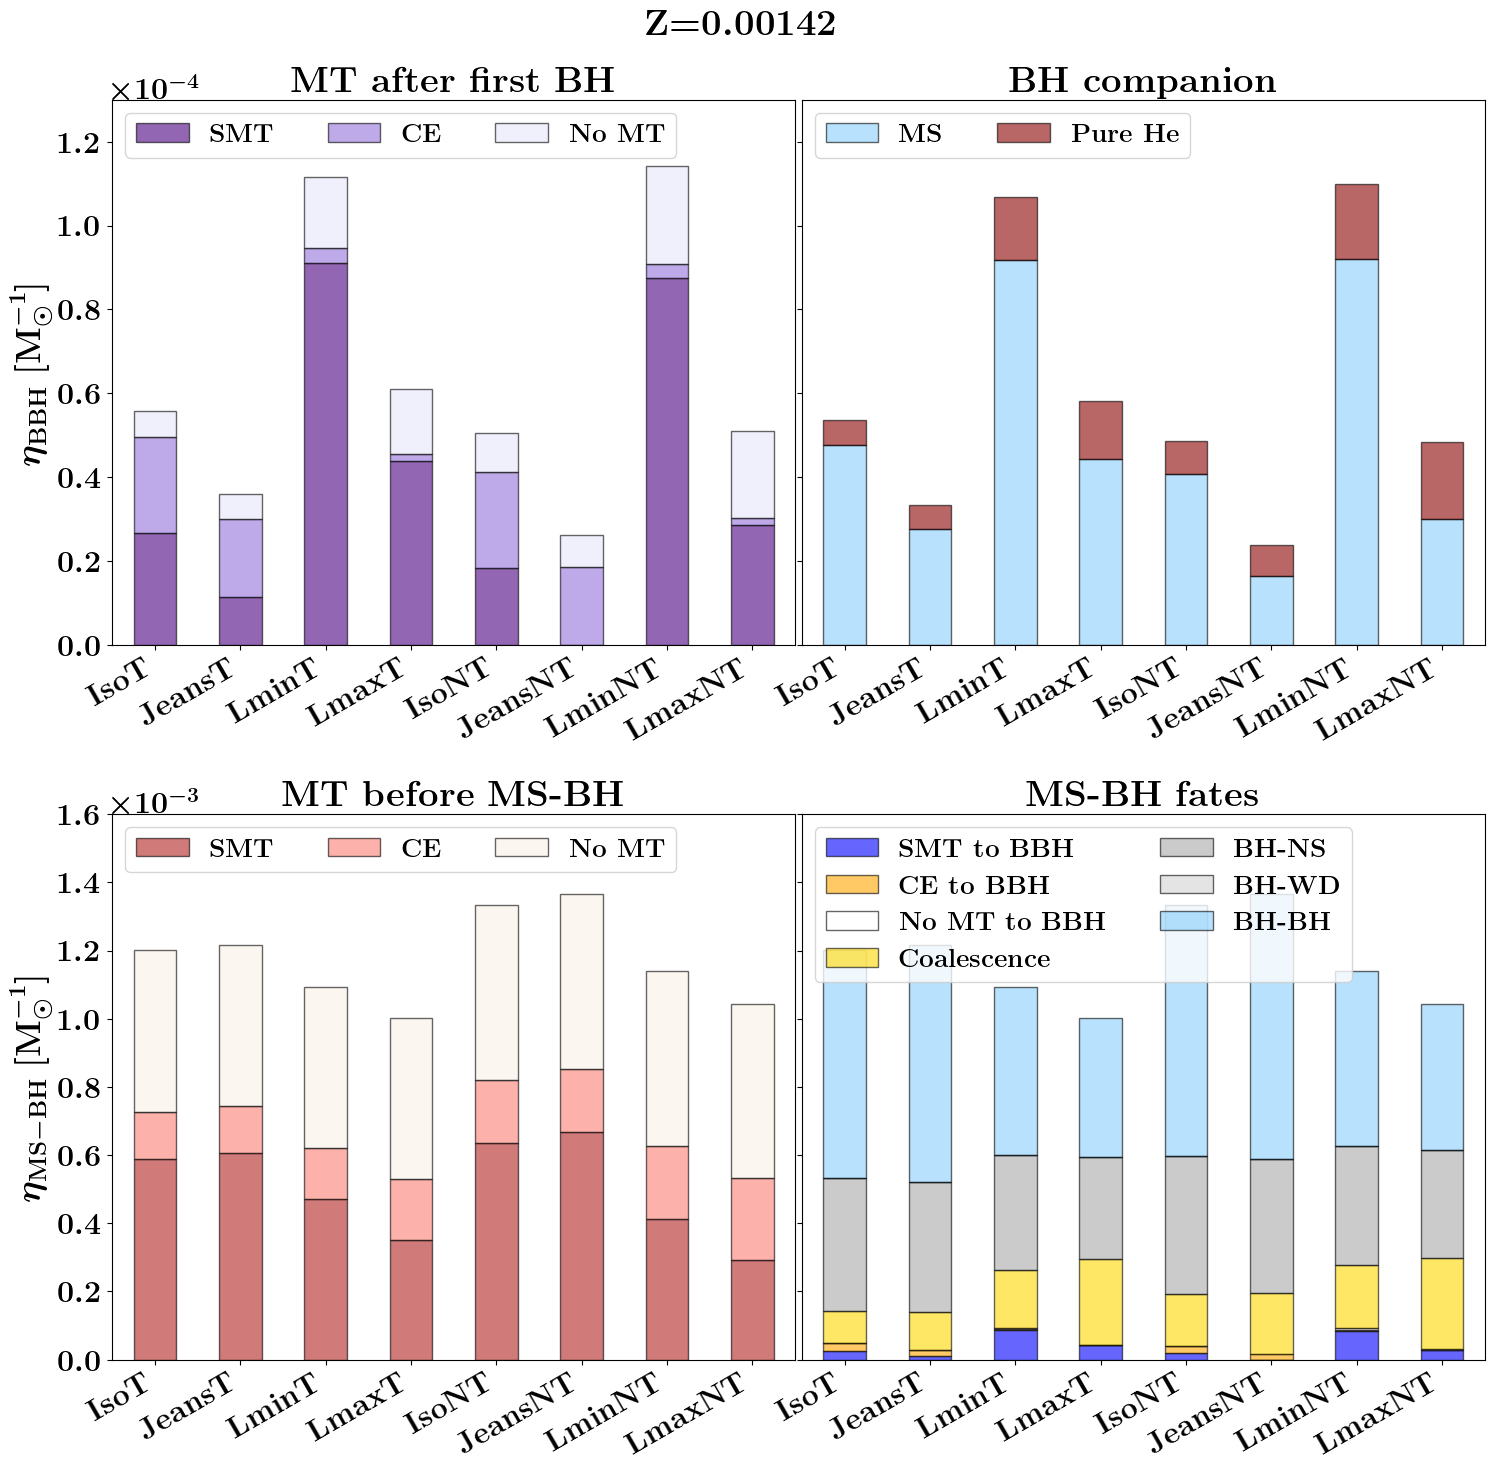

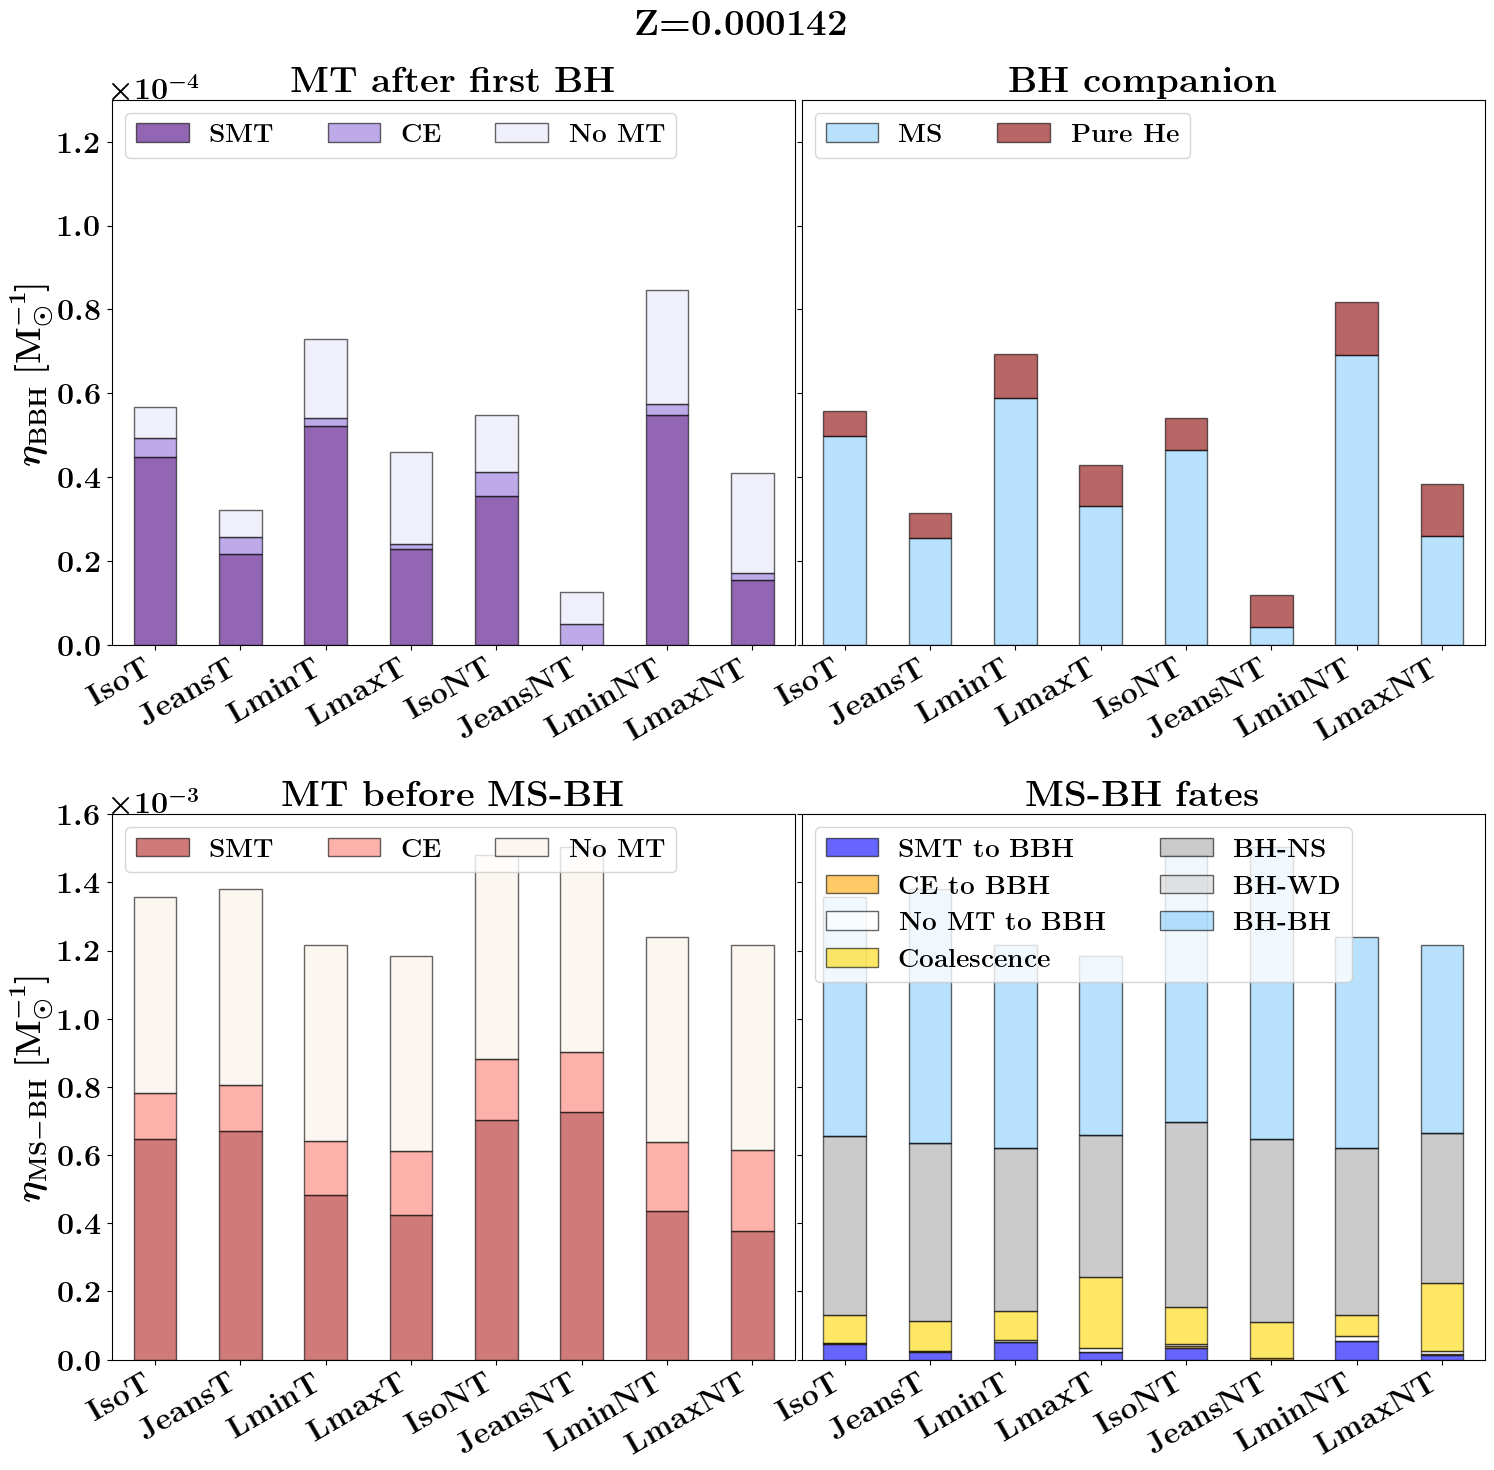

In [4]:
# set parameters to find simulation sets
sevn_version = 'sevn_tides_fix6Agodadt'
angmoms = ['-2','-1','1','1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
Zs = ['0.00142','0.000142']              # metallicity                 # Zs = ['0.00142','0.000142']
tides = ['tides_simple','disabled']     # tides model	           # tides = ['tides_simple', 'disabled']
sims1 = ['IsoT','JeansT','LminT','LmaxT',
        'IsoNT','JeansNT','LminNT','LmaxNT']
sims_labels1 = [r'\textbf{IsoT}',r'\textbf{JeansT}',r'\textbf{LminT}',r'\textbf{LmaxT}',
               r'\textbf{IsoNT}',r'\textbf{JeansNT}',r'\textbf{LminNT}',r'\textbf{LmaxNT}']
#sims2 = ['LmaxNT']
#sims_labels2 = [r'\textbf{LmaxNT}']
sims, sims_labels = sims1, sims_labels1


fate_type = 'BHBH_GW'
binary_type = 'MSBH'
label_names = [f'{fate_type}_from_all_prog', f'{binary_type}_to_all_fates']


path_plots = f'./v_{sevn_version}/plots_efficiency/'
os.makedirs(path_plots, exist_ok=True)
rot = 30

#####################################################
# Mass of the underlying population, as corrected thorugh the 'Correction factor for efficiency' notebook
path_to_df = f'./v_{sevn_version}/mass_simulated'
M_tot_full = pd.read_csv(f'{path_to_df}/mass_corrected.csv', sep=',').drop("Unnamed: 0", axis=1).set_index(pd.Index(sims))

for Z in Zs:   
    fig, axs = plt.subplots(nrows=2, ncols=2,  sharey='row', figsize=(15, 15))
    fig.suptitle(r'\textbf{Z=}'+rf'${Z}$')
    
    for sim_name, label_name in zip(sims,label_names):
        M_tot = M_tot_full.loc[sim_name][Z]  # mass of the underlying population for this set

        print(f'Z={Z} {label_name}')
        if label_name == f'{fate_type}_from_all_prog':  # BBH

            df_all = pd.read_csv(f'./v_{sevn_version}/summary/N_{label_name}_Z{Z}.csv').set_index(pd.Index(sims))
            df_all = df_all.drop(columns=['Unnamed: 0'])
            Nall=df_all[f'N_{label_name}']
            
            ####################################### upper left plot
            # BBHs formed after SMT or CE after the first CO formation
            print('BBH MT post SN')
            N_RLOpostSN=df_all[f'N_RLO_postSN']
            N_CEpostSN=df_all[f'N_CE_postSN']
            N_noMTpostSN=df_all[f'N_noMTpostSN']

            N_df_BBH_MT_postSN = pd.concat([N_RLOpostSN,N_CEpostSN,N_noMTpostSN], axis=1)
            N_df_BBH_MT_postSN.columns = [r'\textbf{SMT}', r'\textbf{CE}', r'\textbf{No MT}']        

            eta_BBH_MT_postSN = N_df_BBH_MT_postSN/M_tot
            print(eta_BBH_MT_postSN)
            print('\n')

            axs[0][0].set_title(r'\textbf{MT after first BH}')
            eta_BBH_MT_postSN.plot.bar(ax=axs[0][0], stacked=True, alpha=0.6, color=['indigo','mediumpurple','lavender'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[0][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[0][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[0][0].set_ylabel(r'$\eta_{\rm BBH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[0][0].legend(ncols = 3, loc='upper left')
            axs[0][0].set_ylim(ymax=1.3e-4)
            
            ##################################### upper right plot
            # Progenitor of BBH
            print('BBH progenitor')
            N_MS_comp=df_all[f'N_MS_comp']
            N_WR_comp=df_all[f'N_WR_comp']
            #N_noWR_comp=df_all[f'N_noWR_comp']     # comment after checking that indeed no binary has this companion

            N_df_BBH_prog = pd.concat([N_MS_comp,N_WR_comp], axis=1)
            N_df_BBH_prog.columns = [r'\textbf{MS}',r'\textbf{Pure He}']        

            eta_BBH_prog = N_df_BBH_prog/M_tot
            print(eta_BBH_prog)
            print('\n')

            axs[0][1].set_title(r'\textbf{BH companion}')
            eta_BBH_prog.plot.bar(ax=axs[0][1], stacked=True, alpha=0.6, color=['lightskyblue','darkred'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[0][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[0][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[0][1].set_ylabel(r'$\eta_{\rm BBH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[0][1].legend(ncols = 2, loc='upper left')
            axs[1][0].set_ylim(ymax=1.6e-3)
            
            
        elif label_name == f'{binary_type}_to_all_fates':

            df_all = pd.read_csv(f'./v_{sevn_version}/summary/N_{label_name}_Z{Z}.csv').set_index(pd.Index(sims))
            df_all = df_all.drop(columns=['Unnamed: 0'])
            Nall=df_all[f'N_{label_name}']
            
            ################################# lower left plot
            # MSBH formed after SMT or CE before the first CO formation
            print('MSBH MT pre SN')
            N_RLOpreSN=df_all[f'N_RLO_preSN']
            N_CEpreSN=df_all[f'N_CE_preSN']
            N_noMTpreSN=df_all[f'N_noMTpreSN']

            N_df_MSBHpreSN = pd.concat([N_RLOpreSN,N_CEpreSN,N_noMTpreSN], axis=1)
            N_df_MSBHpreSN.columns = [r'\textbf{SMT}', r'\textbf{CE}', r'\textbf{No MT}']        

            eta_MSBHpreSN = N_df_MSBHpreSN/M_tot
            print(eta_MSBHpreSN)
            print('\n')

            axs[1][0].set_title(r'\textbf{MT before MS-BH}')
            eta_MSBHpreSN.plot.bar(ax=axs[1][0], stacked=True, alpha=0.6, color=['firebrick','salmon','linen'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[1][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[1][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[1][0].set_ylabel(r'$\eta_{\rm MS-BH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[1][0].legend(ncols = 3, loc='upper left')
            
            ################################## lower right plot
            # MSBH fates
            print('MSBH fates')
            N_RLO_postSN_to_BBH=df_all[f'N_RLO_postSN_to_BBH']
            N_CE_postSN_to_BBH=df_all[f'N_CE_postSN_to_BBH']
            N_noMTpostSN_to_BBH=df_all[f'N_noMTpostSN_to_BBH']
            N_BH=df_all[f'N_BH']
            N_NS=df_all[f'N_NS']
            N_WD=df_all[f'N_WD']
            N_merge=df_all[f'N_merge']

            N_df_MSBHfates = pd.concat([N_RLO_postSN_to_BBH,N_CE_postSN_to_BBH,N_noMTpostSN_to_BBH, N_merge, N_NS, N_WD, N_BH], axis=1)
            N_df_MSBHfates.columns = [r'\textbf{SMT to BBH}', r'\textbf{CE to BBH}', r'\textbf{No MT to BBH}',r'\textbf{Coalescence}',
                                       r'\textbf{BH-NS}',r'\textbf{BH-WD}',r'\textbf{BH-BH}' ]        

            eta_MSBH_fates = N_df_MSBHfates/M_tot
            print(eta_MSBH_fates)
            print('\n')

            axs[1][1].set_title(r'\textbf{MS-BH fates}')
            eta_MSBH_fates.plot.bar(ax=axs[1][1], stacked=True, alpha=0.6, color=['blue','orange','white','gold',
                                                                                  'darkgrey','lightgrey','lightskyblue'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[1][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[1][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[1][1].set_ylabel(r'$\eta_{\rm MS-BH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[1][1].legend(ncols = 2, loc='upper left')           

    #axs[1][0].yaxis.get_offset_text().set_visible(False)
    axs[0][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))   # enforce scientific notation
    axs[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))   # enforce scientific notation
    plt.subplots_adjust(bottom=0.08,left=0.08,right=0.995,top=0.92,hspace=0.31,wspace=0.01)
    fig.savefig(f'{path_plots}/eta{Z}.pdf',dpi=300)

Z=0.00142 BHBH_GW_from_all_prog
BBH MT post SN
        \textbf{SMT}  \textbf{CE}  \textbf{No MT}
LmaxT       0.000026     0.000002        0.000015
LmaxNT      0.000027     0.000002        0.000020


BBH progenitor
        \textbf{MS}  \textbf{Pure He}
LmaxT      0.000027          0.000014
LmaxNT     0.000029          0.000018


Z=0.00142 MSBH_to_all_fates
MSBH MT pre SN
        \textbf{SMT}  \textbf{CE}  \textbf{No MT}
LmaxT       0.000347     0.000179        0.000473
LmaxNT      0.000289     0.000241        0.000514


MSBH fates
        \textbf{SMT to BBH}  \textbf{CE to BBH}  \textbf{No MT to BBH}  \
LmaxT              0.000024            0.000001               0.000001   
LmaxNT             0.000026            0.000001               0.000002   

        \textbf{Coalescence}  \textbf{BH-NS}  \textbf{BH-WD}  \textbf{BH-BH}  
LmaxT               0.000278        0.000299    4.016376e-08        0.000396  
LmaxNT              0.000267        0.000318    3.442608e-08        0.000430  


Z=

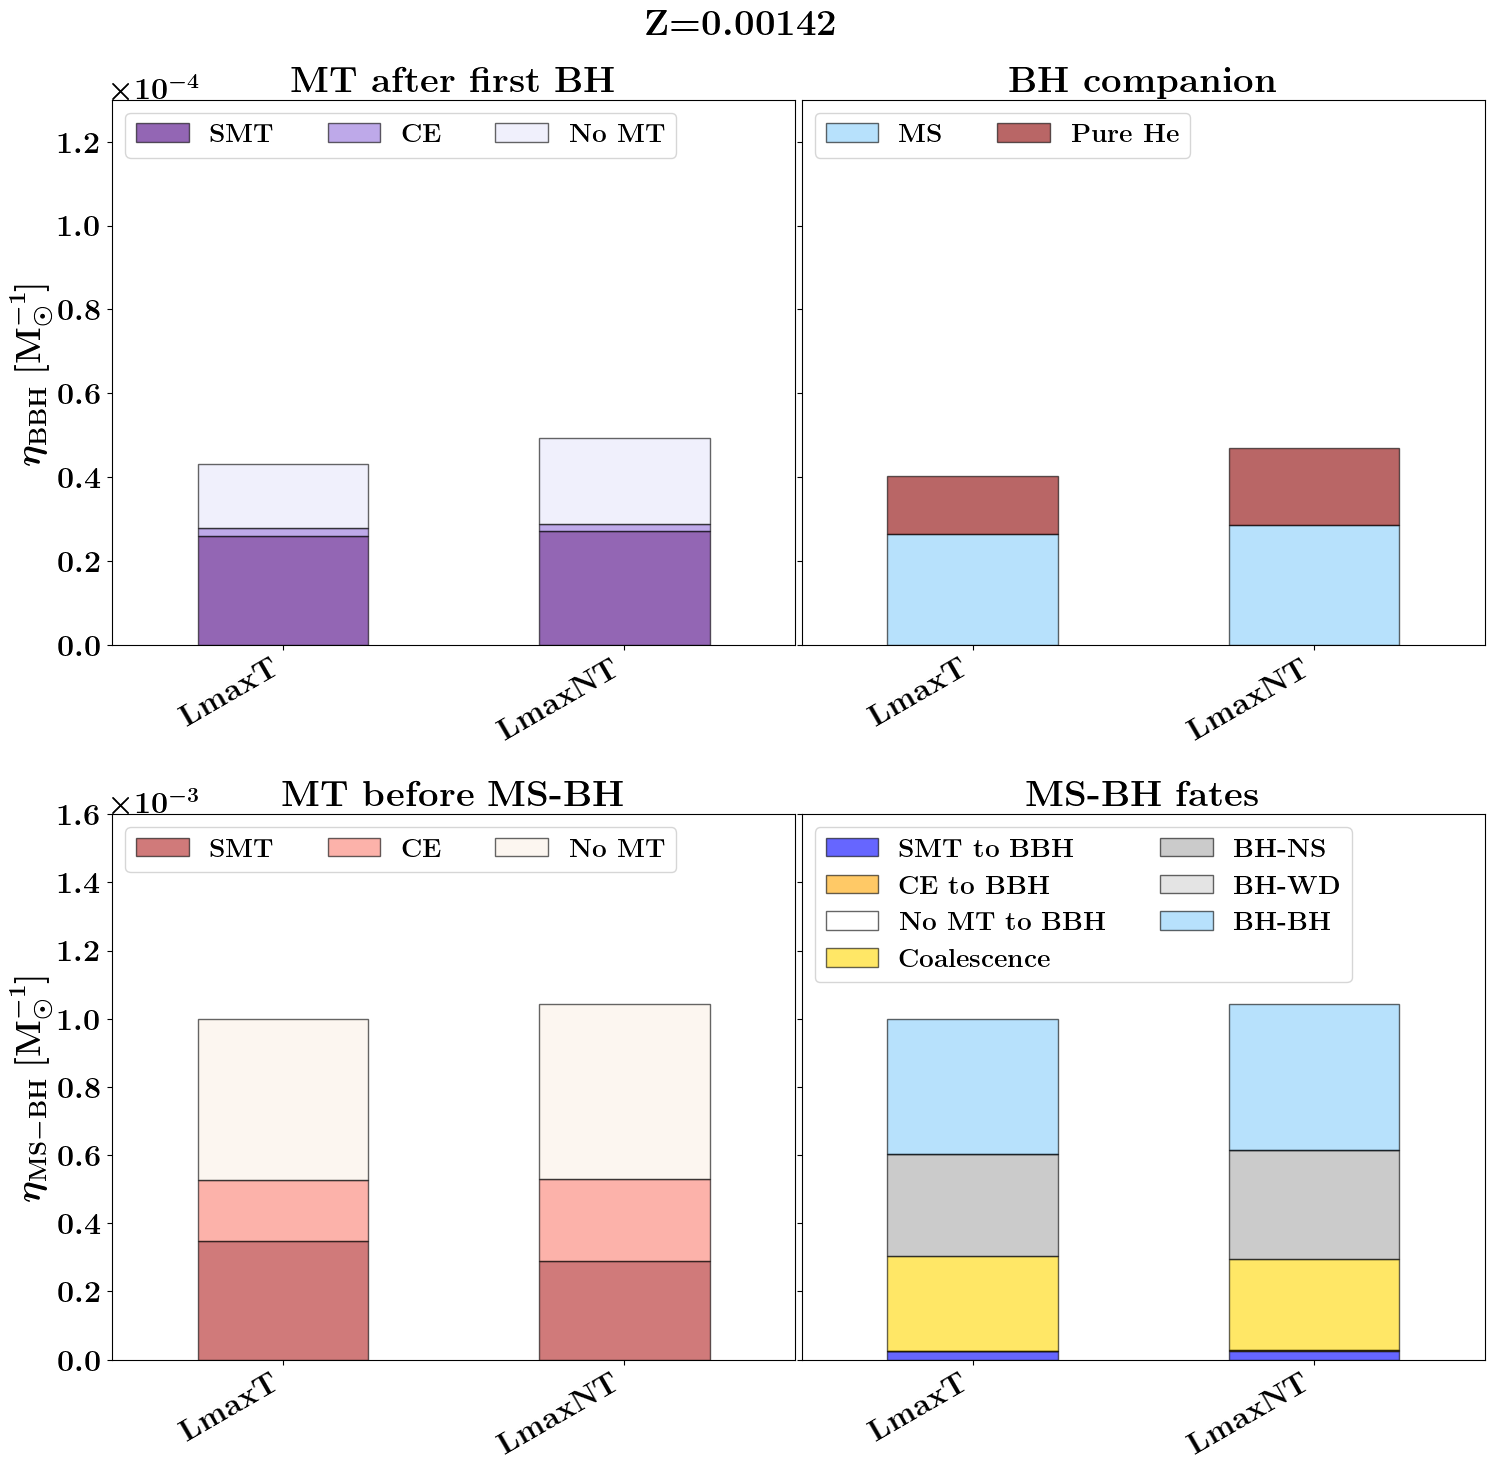

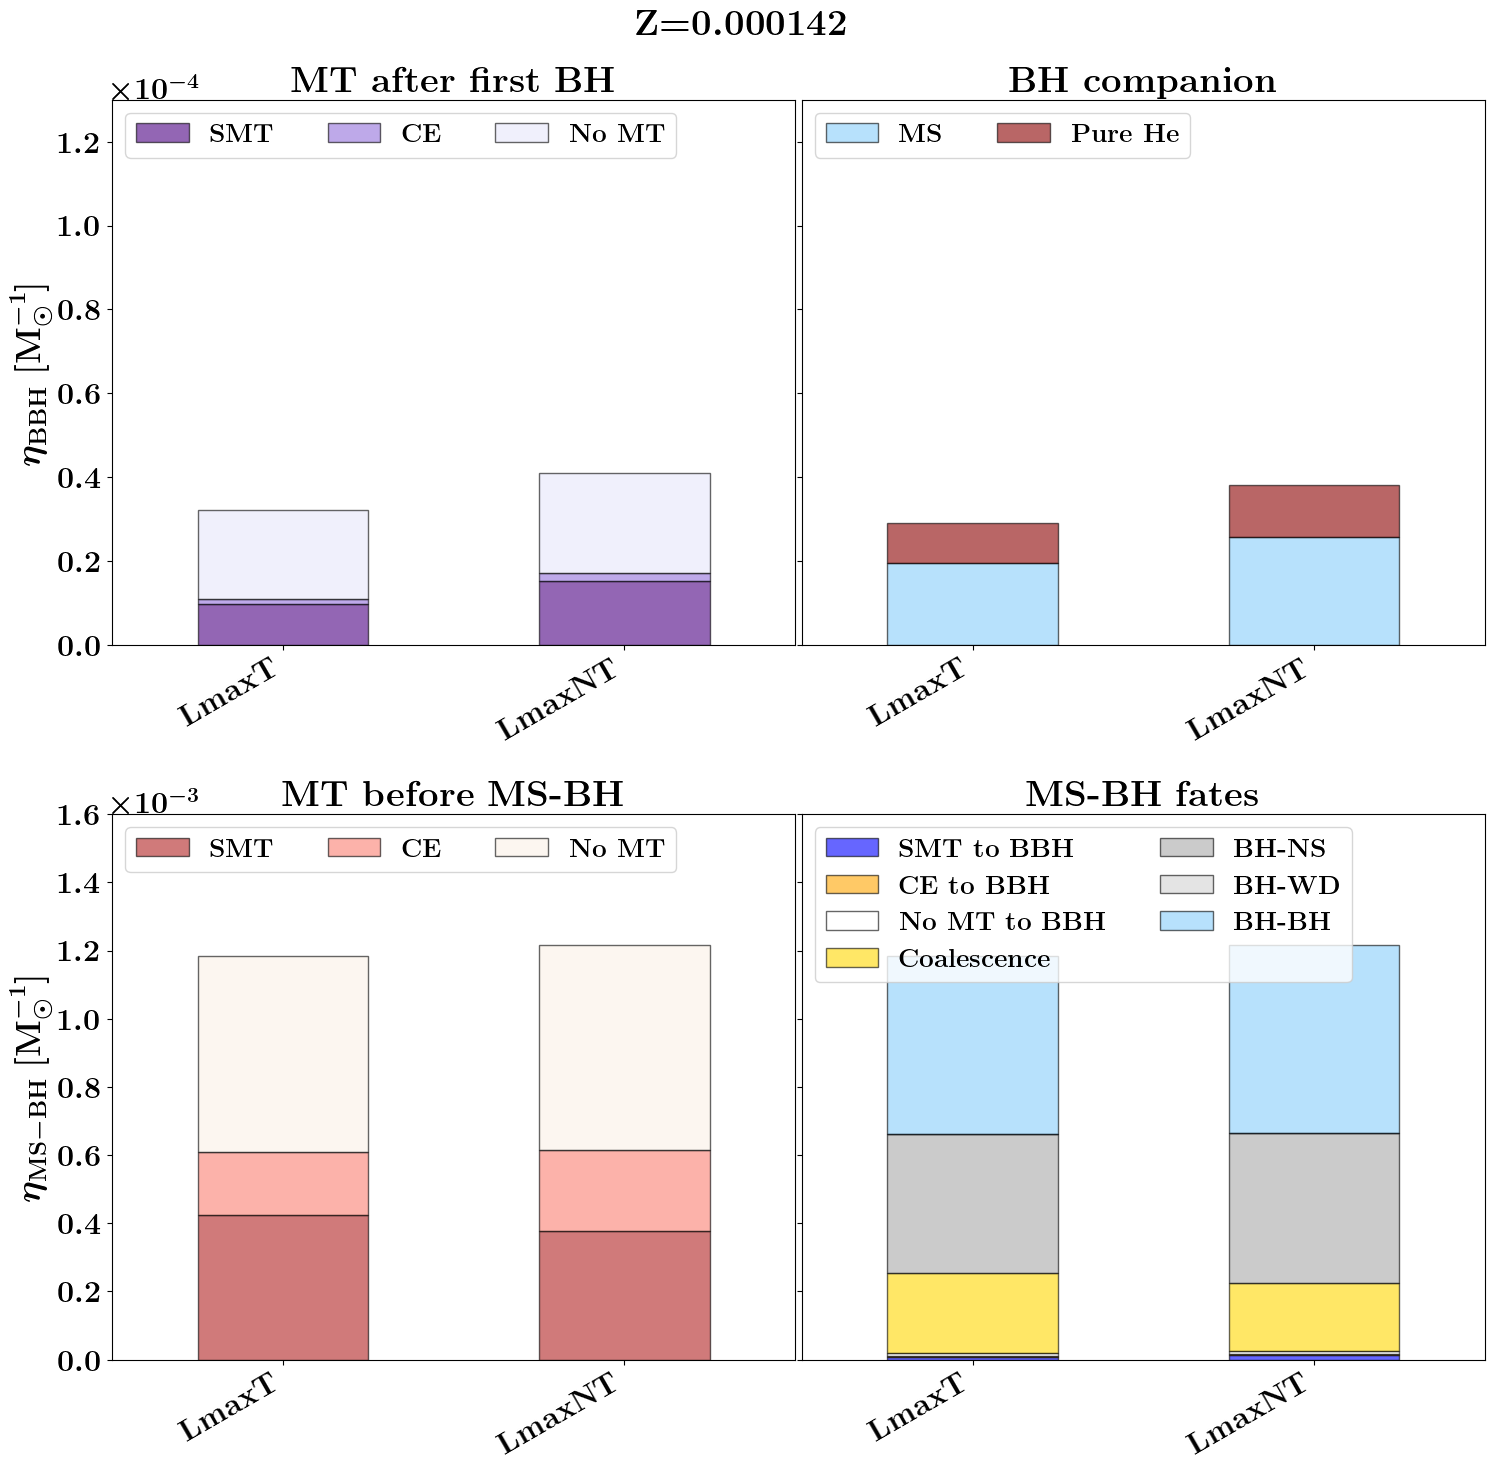

In [2]:
# set parameters to find simulation sets
sevn_version = 'sevn_25ago'
angmoms = ['1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
Zs = ['0.00142','0.000142']              # metallicity                 # Zs = ['0.00142','0.000142']
tides = ['tides_simple','disabled']     # tides model	           # tides = ['tides_simple', 'disabled']
sims1 = ['IsoT','JeansT','LminT','LmaxT',
        'IsoNT','JeansNT','LminNT','LmaxNT']
sims_labels1 = [r'\textbf{IsoT}',r'\textbf{JeansT}',r'\textbf{LminT}',r'\textbf{LmaxT}',
               r'\textbf{IsoNT}',r'\textbf{JeansNT}',r'\textbf{LminNT}',r'\textbf{LmaxNT}']
sims2 = ['LmaxT','LmaxNT']
sims_labels2 = [r'\textbf{LmaxT}', r'\textbf{LmaxNT}']
sims, sims_labels = sims2, sims_labels2


fate_type = 'BHBH_GW'
binary_type = 'MSBH'
label_names = [f'{fate_type}_from_all_prog', f'{binary_type}_to_all_fates']


path_plots = f'./v_{sevn_version}/plots_efficiency/'
os.makedirs(path_plots, exist_ok=True)
rot = 30

#####################################################
# Mass of the underlying population, as corrected thorugh the 'Correction factor for efficiency' notebook
path_to_df = f'./v_{sevn_version}/mass_simulated'
M_tot_full = pd.read_csv(f'{path_to_df}/mass_corrected.csv', sep=',').drop("Unnamed: 0", axis=1).set_index(pd.Index(sims))

for Z in Zs:   
    fig, axs = plt.subplots(nrows=2, ncols=2,  sharey='row', figsize=(15, 15))
    fig.suptitle(r'\textbf{Z=}'+rf'${Z}$')
    
    for sim_name, label_name in zip(sims,label_names):
        M_tot = M_tot_full.loc[sim_name][Z]  # mass of the underlying population for this set
        print(f'Z={Z} {label_name}')
        
        if label_name == f'{fate_type}_from_all_prog':  # BBH

            df_all = pd.read_csv(f'./v_{sevn_version}/summary/N_{label_name}_Z{Z}.csv').set_index(pd.Index(sims))
            df_all = df_all.drop(columns=['Unnamed: 0'])
            Nall=df_all[f'N_{label_name}']
            
            ####################################### upper left plot
            # BBHs formed after SMT or CE after the first CO formation
            print('BBH MT post SN')
            N_RLOpostSN=df_all[f'N_RLO_postSN']
            N_CEpostSN=df_all[f'N_CE_postSN']
            N_noMTpostSN=df_all[f'N_noMTpostSN']

            N_df_BBH_MT_postSN = pd.concat([N_RLOpostSN,N_CEpostSN,N_noMTpostSN], axis=1)
            N_df_BBH_MT_postSN.columns = [r'\textbf{SMT}', r'\textbf{CE}', r'\textbf{No MT}']        

            eta_BBH_MT_postSN = N_df_BBH_MT_postSN/M_tot
            print(eta_BBH_MT_postSN)
            print('\n')

            axs[0][0].set_title(r'\textbf{MT after first BH}')
            eta_BBH_MT_postSN.plot.bar(ax=axs[0][0], stacked=True, alpha=0.6, color=['indigo','mediumpurple','lavender'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[0][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[0][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[0][0].set_ylabel(r'$\eta_{\rm BBH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[0][0].legend(ncols = 3, loc='upper left')
            axs[0][0].set_ylim(ymax=1.3e-4)
            
            ##################################### upper right plot
            # Progenitor of BBH
            print('BBH progenitor')
            N_MS_comp=df_all[f'N_MS_comp']
            N_WR_comp=df_all[f'N_WR_comp']
            #N_noWR_comp=df_all[f'N_noWR_comp']     # comment after checking that indeed no binary has this companion

            N_df_BBH_prog = pd.concat([N_MS_comp,N_WR_comp], axis=1)
            N_df_BBH_prog.columns = [r'\textbf{MS}',r'\textbf{Pure He}']        

            eta_BBH_prog = N_df_BBH_prog/M_tot
            print(eta_BBH_prog)
            print('\n')

            axs[0][1].set_title(r'\textbf{BH companion}')
            eta_BBH_prog.plot.bar(ax=axs[0][1], stacked=True, alpha=0.6, color=['lightskyblue','darkred'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[0][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[0][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[0][1].set_ylabel(r'$\eta_{\rm BBH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[0][1].legend(ncols = 2, loc='upper left')
            axs[1][0].set_ylim(ymax=1.6e-3)
            
            
        elif label_name == f'{binary_type}_to_all_fates':

            df_all = pd.read_csv(f'./v_{sevn_version}/summary/N_{label_name}_Z{Z}.csv').set_index(pd.Index(sims))
            df_all = df_all.drop(columns=['Unnamed: 0'])
            Nall=df_all[f'N_{label_name}']
            
            ################################# lower left plot
            # MSBH formed after SMT or CE before the first CO formation
            print('MSBH MT pre SN')
            N_RLOpreSN=df_all[f'N_RLO_preSN']
            N_CEpreSN=df_all[f'N_CE_preSN']
            N_noMTpreSN=df_all[f'N_noMTpreSN']

            N_df_MSBHpreSN = pd.concat([N_RLOpreSN,N_CEpreSN,N_noMTpreSN], axis=1)
            N_df_MSBHpreSN.columns = [r'\textbf{SMT}', r'\textbf{CE}', r'\textbf{No MT}']        

            eta_MSBHpreSN = N_df_MSBHpreSN/M_tot
            print(eta_MSBHpreSN)
            print('\n')

            axs[1][0].set_title(r'\textbf{MT before MS-BH}')
            eta_MSBHpreSN.plot.bar(ax=axs[1][0], stacked=True, alpha=0.6, color=['firebrick','salmon','linen'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[1][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[1][0].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[1][0].set_ylabel(r'$\eta_{\rm MS-BH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[1][0].legend(ncols = 3, loc='upper left')
            
            ################################## lower right plot
            # MSBH fates
            print('MSBH fates')
            N_RLO_postSN_to_BBH=df_all[f'N_RLO_postSN_to_BBH']
            N_CE_postSN_to_BBH=df_all[f'N_CE_postSN_to_BBH']
            N_noMTpostSN_to_BBH=df_all[f'N_noMTpostSN_to_BBH']
            N_BH=df_all[f'N_BH']
            N_NS=df_all[f'N_NS']
            N_WD=df_all[f'N_WD']
            N_merge=df_all[f'N_merge']
            
            N_df_MSBHfates = pd.concat([N_RLO_postSN_to_BBH,N_CE_postSN_to_BBH,N_noMTpostSN_to_BBH, N_merge, N_NS, N_WD, N_BH], axis=1)
            N_df_MSBHfates.columns = [r'\textbf{SMT to BBH}', r'\textbf{CE to BBH}', r'\textbf{No MT to BBH}',r'\textbf{Coalescence}',
                                       r'\textbf{BH-NS}',r'\textbf{BH-WD}',r'\textbf{BH-BH}' ]        

            eta_MSBH_fates = N_df_MSBHfates/M_tot
            print(eta_MSBH_fates)
            print('\n')

            axs[1][1].set_title(r'\textbf{MS-BH fates}')
            eta_MSBH_fates.plot.bar(ax=axs[1][1], stacked=True, alpha=0.6, color=['blue','orange','white','gold',
                                                                                  'darkgrey','lightgrey','lightskyblue'], ec='k', zorder=2)

            #ax.annotate(r'\textbf{Z}'+f'$=0.{Z}$\n'+r'$\alpha_{\rm CE}$'+f'$={a}$',xy=(0.98,0.82),xycoords='axes fraction', horizontalalignment='right')
            axs[1][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            axs[1][1].set_xticklabels(sims_labels,weight='bold',rotation=rot, ha='right')
            #fig.text(0.04, 0.5, r'$\eta BBH ~ [M_\odot^{-1}$]',weight='bold', va='center', rotation='vertical')
            axs[1][1].set_ylabel(r'$\eta_{\rm MS-BH} ~ [\rm M_\odot^{-1}]$',weight='bold')
            axs[1][1].legend(ncols = 2, loc='upper left')           

    #axs[1][0].yaxis.get_offset_text().set_visible(False)
    axs[0][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))   # enforce scientific notation
    axs[1][0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))   # enforce scientific notation
    plt.subplots_adjust(bottom=0.08,left=0.08,right=0.995,top=0.92,hspace=0.31,wspace=0.01)
    fig.savefig(f'{path_plots}/eta{Z}.pdf',dpi=300)